In [55]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('axes', titlesize=14)
plt.rc('font', size=14)


### Model

In [38]:
def poisson_spike_train(rate, t_sim, dt, silent=True): 
    survival = 1 - np.exp(-rate*dt) 
    spike = np.random.rand(int(t_sim/dt)) < survival
    if silent:
        spike[-int(len(spike)*0.1):] = 0
    return spike

def two_close_spikes(t_sim, dt, third_spike=False, interval=20):
    spike = np.zeros(int(t_sim/dt))
    spike[100] = 1
    spike[120] = 1
    if third_spike:
        spike[120+interval] = 1
    return spike

def regular_spikes(t_sim, dt, rate):
    spike = np.zeros(int(t_sim/dt))
    for i in range(0, len(spike), int(1/(rate*dt))):
        spike[i] = 1
    return spike

def calcium_concentration(spike, tau_c, t_sim, dt, R1):
    spike = spike * R1 #R is the amount of calcium ions released per spike
    calcium = np.zeros(int(t_sim/dt))
    for i in range(1, len(spike)):
        calcium[i] = calcium[i-1]*(1-dt/tau_c) + dt/tau_c* spike[i-1]
    return calcium

def vesicle_fusion( tau_v, t_sim, dt, v_0, release_delay,R2, alpha, calcium, spike):
    release = np.zeros(int(t_sim/dt))
    release_delay = int(release_delay/dt)
    
    vecicle = np.zeros(int(t_sim/dt))
    vecicle[0]=v_0
    for i in range(1, len(release)):
        vecicle[i] =  (1 - dt/tau_v) * vecicle[i-1] + dt/tau_v * (v_0 - R2*release[i-1]) 
        release[i] = alpha*calcium[i-release_delay]* spike[i-release_delay]* (vecicle[i-release_delay])
    return vecicle, release


### response to two close spikes

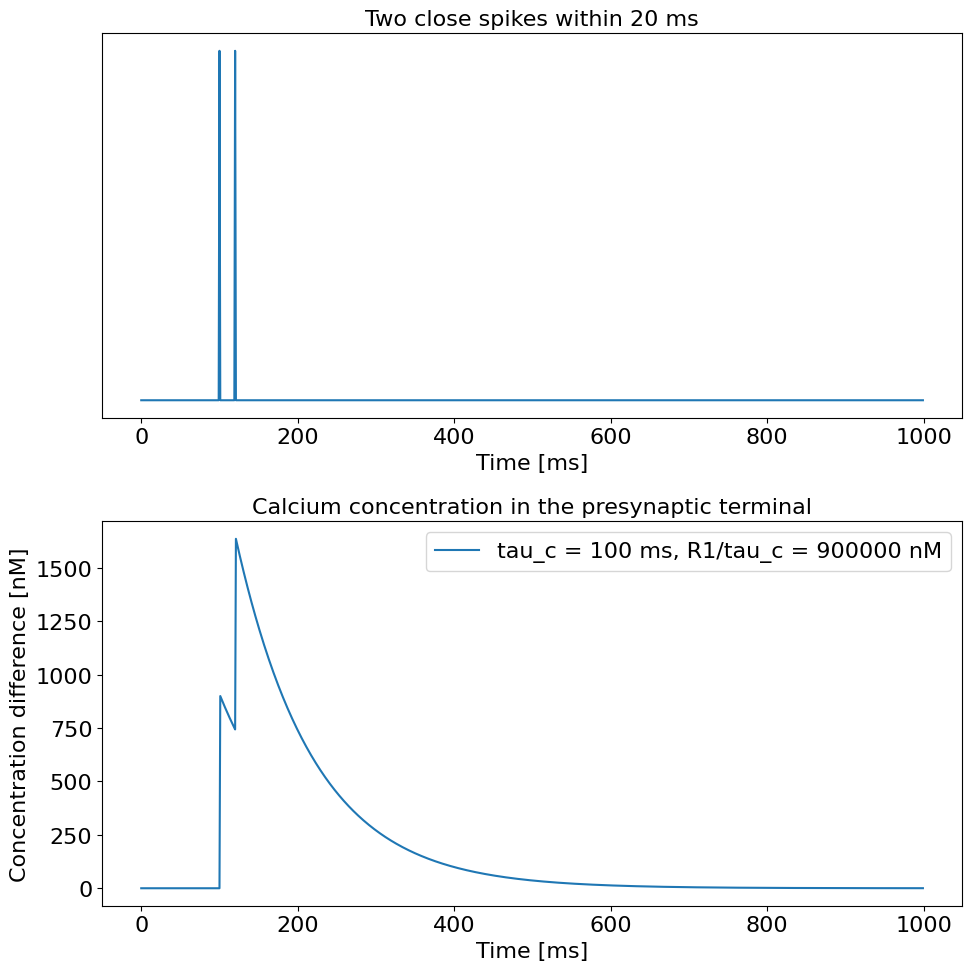

In [13]:
t_sim= 1
dt = 0.001

tau_c = 100 *dt 
R1 = 9e5 * tau_c

spike = two_close_spikes(t_sim, dt)

calcium = calcium_concentration(spike, tau_c, t_sim, dt, R1)

fig, ax = plt.subplots(2,1, figsize=(10,10), layout='tight')
ax[0].plot(spike)
ax[0].set_title('Two close spikes within 20 ms')
ax[0].set_xlabel('Time [ms]')
ax[0].set_yticks([])
# ax[0].set_ylabel('Spike')


ax[1].plot(calcium, label=f'tau_c = {int(tau_c/dt)} ms, R1/tau_c = {int(R1/tau_c)} nM')
ax[1].set_title('Calcium concentration in the presynaptic terminal')
ax[1].set_ylabel('Concentration difference [nM]')
ax[1].set_xlabel('Time [ms]')
ax[1].legend()


127.5834567752809


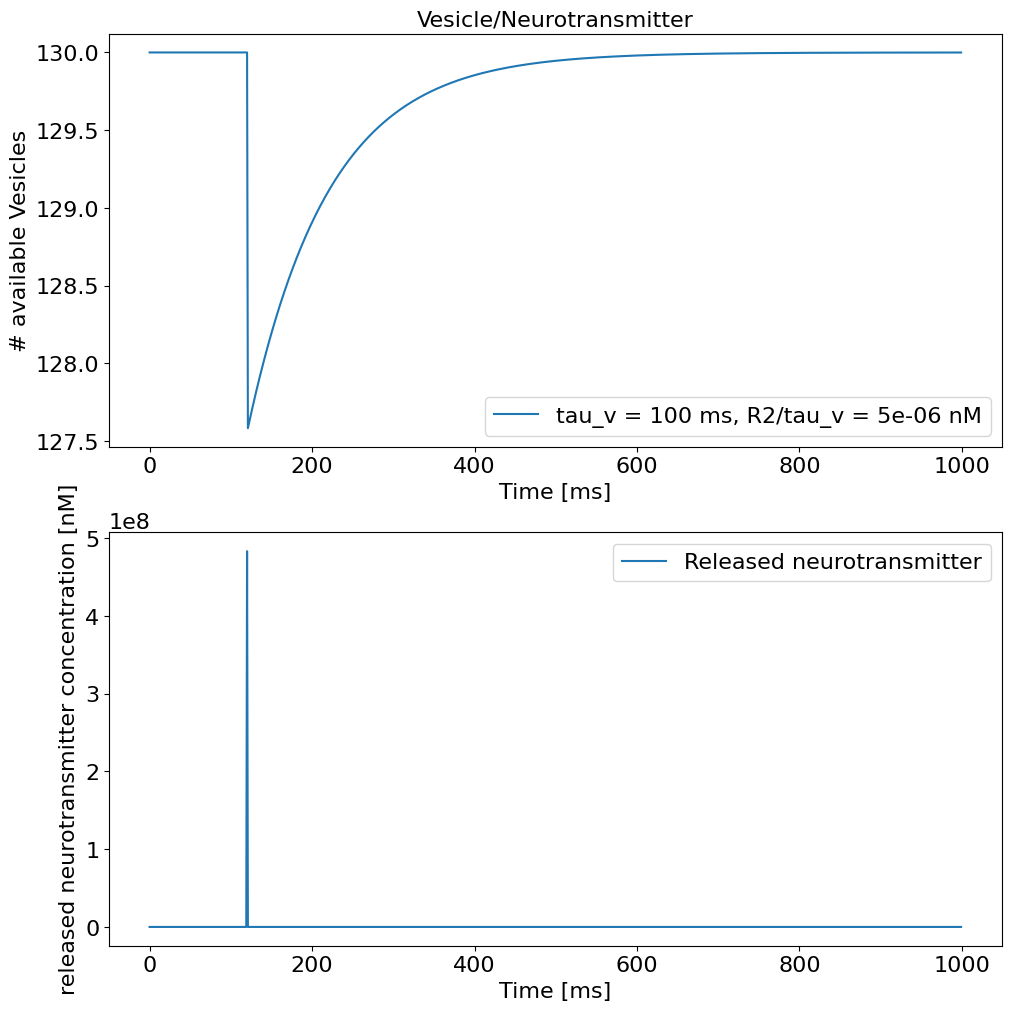

In [14]:
tau_v = 100*dt 

R2=5e-6* tau_v #rate of vesicle release
v_0 = 130 #maximum vesicle pool size
release_delay = 0 #delay between calcium influx and vesicle release
alpha=5e3

vesicle, release = vesicle_fusion(tau_v, t_sim, dt, v_0, release_delay, R2,alpha, calcium, spike)
# convert nM to MM
# release = release/1e6

print(vesicle[121])

fig, ax = plt.subplots(2,1, figsize=(10,10), layout='constrained')

ax[0].plot(vesicle, label=f'tau_v = {int(tau_v/dt)} ms, R2/tau_v = {(R2/tau_v)} nM')
# ax[0].plot(release, label='Released neurotransmitter')
ax[0].set_xlabel('Time [ms]')
ax[0].set_ylabel('# available Vesicles')
ax[0].set_title('Vesicle/Neurotransmitter')
ax[0].legend()
# ax[0].plot(vesicle, label='available Vesicles')
ax[1].plot(release, label='Released neurotransmitter')
ax[1].set_xlabel('Time [ms]')
ax[1].set_ylabel('released neurotransmitter concentration [nM]')
# ax[1].set_title('Vesicle Pool')
ax[1].legend()
plt.show()


### Facilitaion

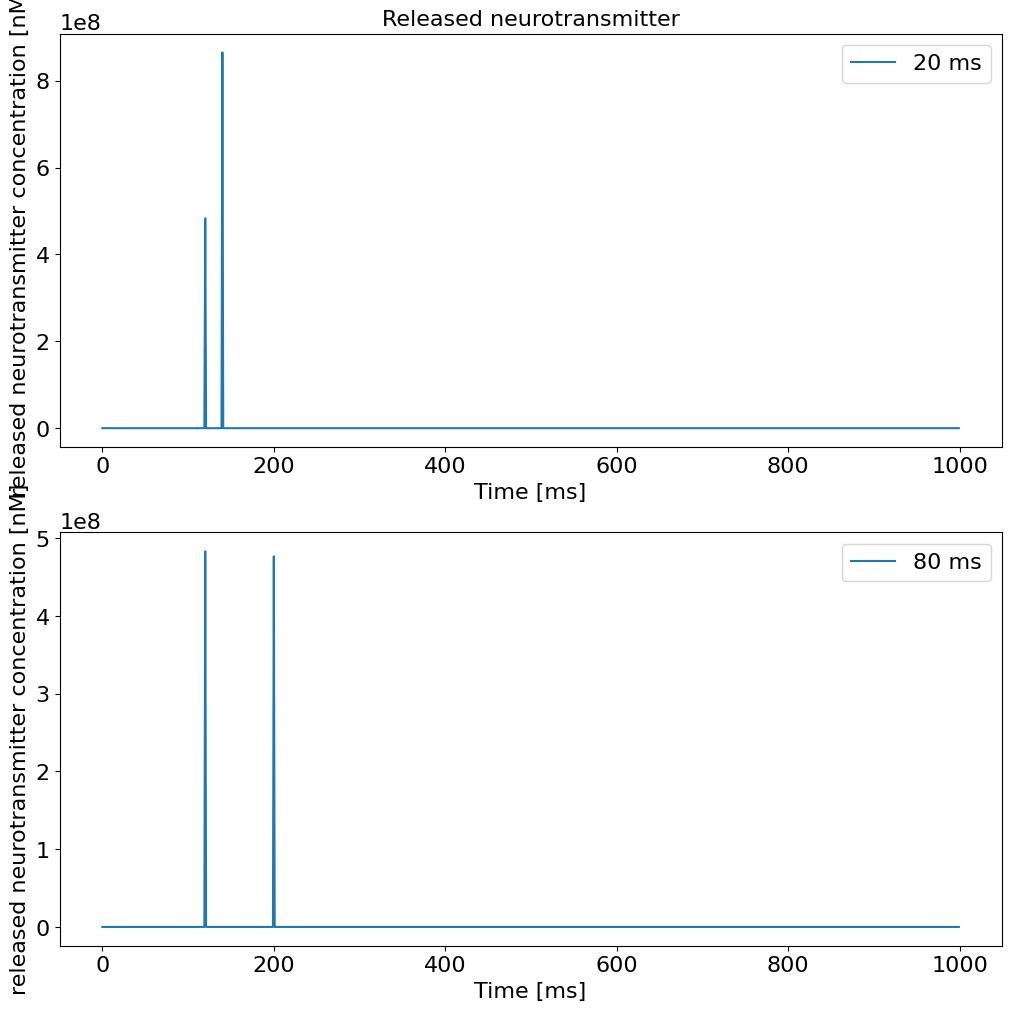

In [15]:
spike = two_close_spikes(t_sim, dt, third_spike=True)
calcium = calcium_concentration(spike, tau_c, t_sim, dt, R1)
vesicle, release1 = vesicle_fusion(tau_v, t_sim, dt, v_0, release_delay, R2,alpha, calcium, spike)

spike = two_close_spikes(t_sim, dt, third_spike=True, interval=80)
calcium = calcium_concentration(spike, tau_c, t_sim, dt, R1)
vesicle, release2 = vesicle_fusion(tau_v, t_sim, dt, v_0, release_delay, R2,alpha, calcium, spike)

fig, ax = plt.subplots(2,1, figsize=(10,10), layout='constrained')
ax[0].plot(release1, label='20 ms')
ax[0].set_xlabel('Time [ms]')
ax[0].set_ylabel('released neurotransmitter concentration [nM]')
ax[0].set_title('Released neurotransmitter')
ax[0].legend()

ax[1].plot(release2, label='80 ms')
ax[1].set_xlabel('Time [ms]')
ax[1].set_ylabel('released neurotransmitter concentration [nM]')
ax[1].legend()

plt.show()

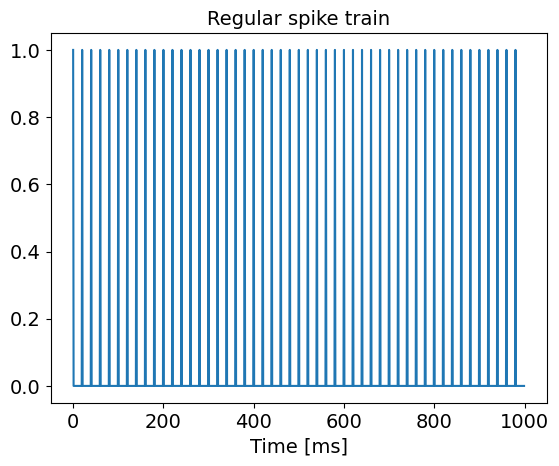

Text(0.5, 0.98, 'Released neurotransmitter ')

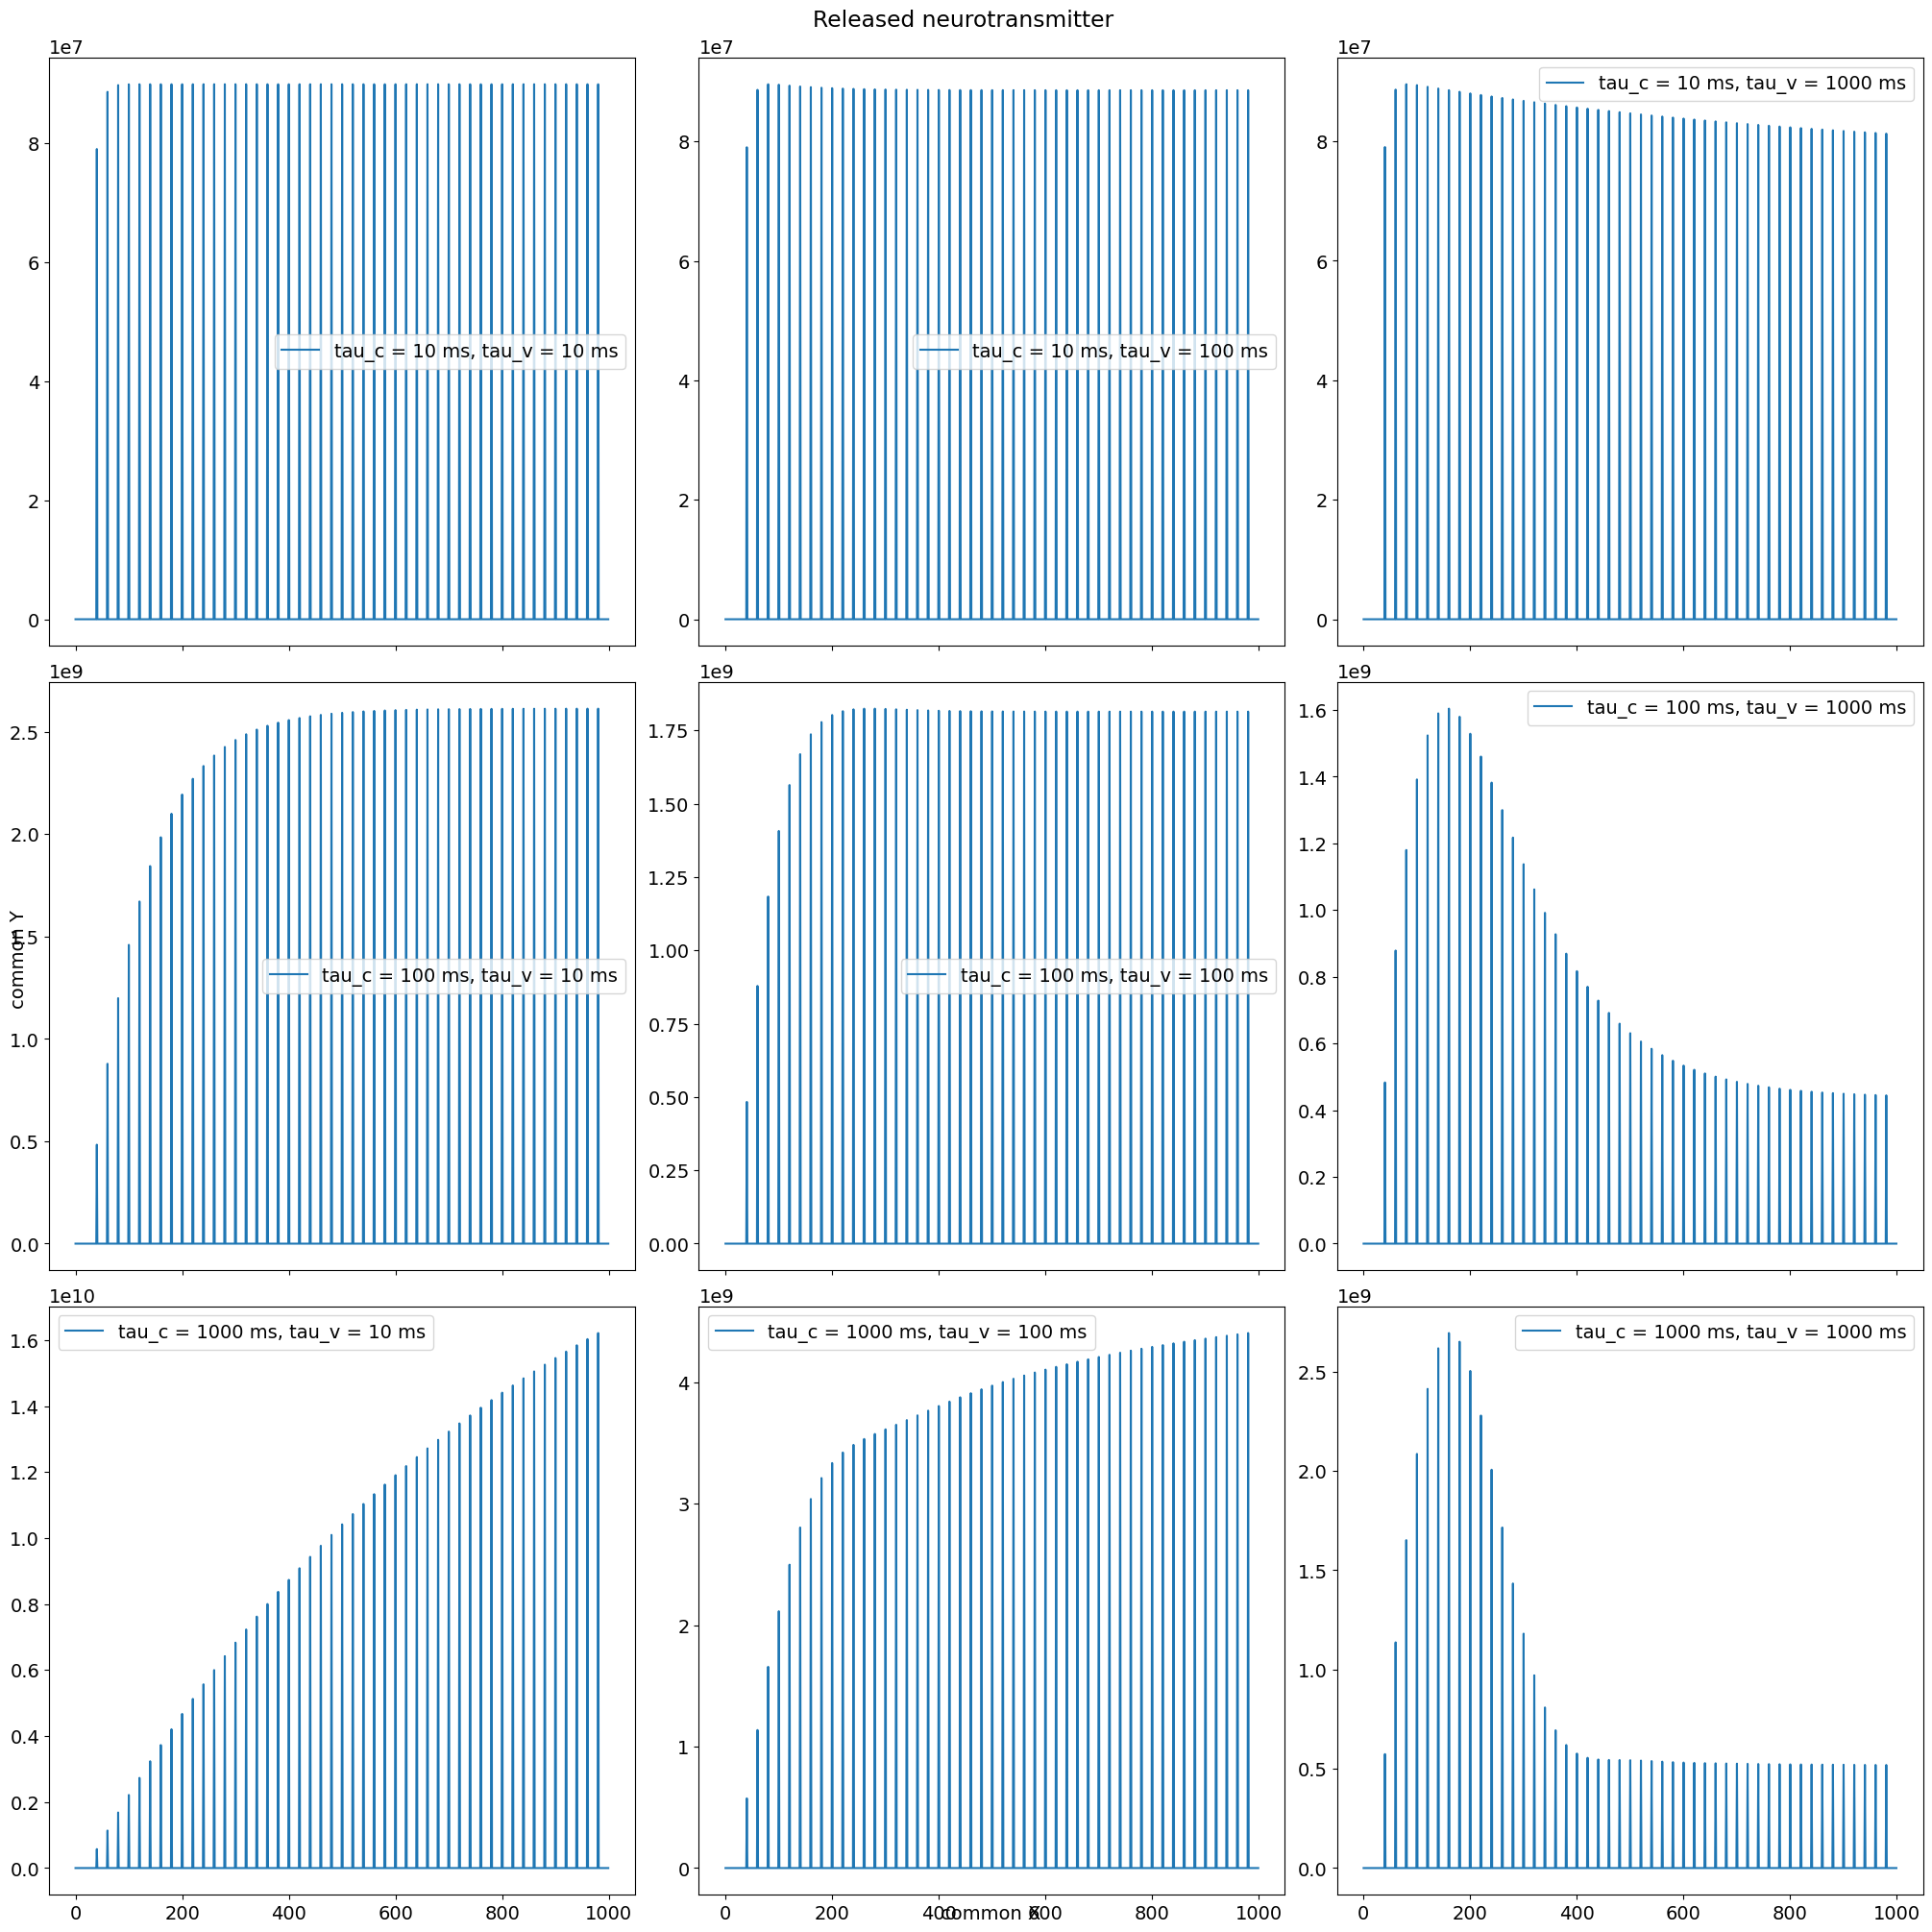

In [72]:
spike = regular_spikes(t_sim, dt, 50)
plt.plot(spike)
plt.title('Regular spike train')
plt.xlabel('Time [ms]')
plt.show()
alpha=5e3
release_delay = 20*dt
taus  = [10, 100, 1000]
fig, ax = plt.subplots(len(taus),len(taus), figsize=(20,20), layout='constrained', sharex=True, sharey=False)
for i in range(len(taus)):
    for j in range(len(taus)):
        tau_c = taus[i] *dt 
        R1 = 9e5 * tau_c
        tau_v = taus[j]*dt 
        R2=5e-6* tau_v #rate of vesicle release
        calcium = calcium_concentration(spike, tau_c, t_sim, dt, R1)
        vesicle, release = vesicle_fusion(tau_v, t_sim, dt, v_0, release_delay, R2,alpha, calcium, spike)
        ax[i,j].plot(release, label=f'tau_c = {int(tau_c/dt)} ms, tau_v = {int(tau_v/dt)} ms')

        ax[i,j].legend()
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("common X")
plt.ylabel("common Y")
plt.savefig('vesicle_release.png')
fig.suptitle('Released neurotransmitter ')
  